In [1]:
from scipy import stats
import pickle
from collections import OrderedDict
from utils import *
import numpy as np

### Gold labels

In [2]:
prop_tech_e, prop_tech, _, _, p2id = settings("tools/data/propaganda-techniques-names.txt", "Propaganda", False) 
ids, texts, labels = read_data("datasets-v5/tasks-2-3/test", binary="Propaganda")

flat_list_i, flat_list, flat_list_l, _ = corpus2list(p2id, ids, texts, labels, True, False)

{'O': 0, 'Propaganda': 1}


In [3]:
# Propagandist Tokens
dict_prop = dict()
# All Tokens
dict_total_count = dict()
dict_total_sent = dict()
dict_weight = dict()
for doc_id, sentence in zip(flat_list_i, flat_list_l):
    if doc_id not in dict_prop:
        dict_prop[doc_id] = 0
        dict_total_count[doc_id] = 0  
        dict_weight[doc_id] = 0
        dict_total_sent[doc_id] = 0
    isProp = False
    for token in sentence:
        if token == 1:
            isProp = True
            dict_prop[doc_id] += 1
        dict_total_count[doc_id] += 1
    if isProp:
        dict_weight[doc_id] += 1
    dict_total_sent[doc_id] += 1
print (dict_prop)

{'788626289': 3, '730093263': 40, '999000858': 132, '111111114': 30, '730019938': 30, '776385494': 13, '999001323': 17, '700387229': 75, '698719689': 38, '790666929': 11, '699142854': 160, '738442776': 74, '761722669': 25, '999001211': 21, '788271400': 23, '725731328': 234, '706501640': 57, '707566605': 89, '705035735': 70, '763114850': 92, '787730392': 170, '702111021': 78, '699478811': 256, '706088110': 72, '701447437': 120, '708487008': 68, '738361208': 75, '725276027': 103, '999001256': 101, '777785889': 48, '707772906': 217, '708561738': 154, '738447109': 128, '730036755': 0, '761955563': 75, '111111123': 2, '778730964': 140, '763412406': 179, '773650987': 138, '777720051': 35, '999001259': 107, '790499380': 8, '787085939': 71, '777869943': 192, '999000878': 9, '788273361': 21, '711716996': 134, '789512681': 52, '730061195': 0, '761568202': 5, '703056647': 111, '794141509': 213, '707451080': 256, '763280007': 193, '111111115': 42, '727569885': 105, '708071969': 91, '783774960': 25

In [4]:
dict_measure = dict()
# Divide number of propagandist tokens by total number of tokens
for x in dict_prop:
    weight = dict_weight[x]/dict_total_sent[x]
    dict_measure[x] = dict_prop[x]/dict_total_count[x] * weight

# Sort dict by the calculated metric
sorted_gold = sorted(dict_measure.items(), key=lambda x: x[1])


In [5]:
sorted_gold

[('730036755', 0.0),
 ('730061195', 0.0),
 ('730081389', 0.0),
 ('111111121', 0.0),
 ('999000851', 4.489942528735632e-05),
 ('111111123', 6.582411795681939e-05),
 ('788626289', 0.00016233766233766234),
 ('790499380', 0.0003322995126273815),
 ('789753303', 0.0003510311540149188),
 ('761575506', 0.0008958566629339305),
 ('730269378', 0.0010887316276537834),
 ('776385494', 0.001214347988541537),
 ('788273361', 0.0013833080824715103),
 ('761568202', 0.0014952153110047847),
 ('787966255', 0.0016156670746634027),
 ('790666929', 0.0019475920679886685),
 ('999001323', 0.0023587523587523585),
 ('999000878', 0.0026800071466857246),
 ('785331076', 0.0034353419567427356),
 ('730019938', 0.003971143027334701),
 ('784382409', 0.004086371023914558),
 ('786004130', 0.004193175245806824),
 ('788271400', 0.0042255332439234995),
 ('999001211', 0.004259462090787392),
 ('999001290', 0.004369462313387547),
 ('730246508', 0.004456824512534819),
 ('789512681', 0.004859147032805472),
 ('761722669', 0.005145091

### Predicted labels

In [6]:
gold_dict_measure = dict_measure

In [7]:
dict_prop = dict()
dict_total_count = dict()
dict_measure = dict()
dict_total_sent = dict()
dict_weight = dict()
with open ('outfile_test', 'rb') as fp:
    itemlist = pickle.load(fp)
clearList = []
for j in itemlist:
    tlist = []
    for x in j:
        if x not in [2,3]:
            tlist.append(x)
    clearList.append(tlist)
    
for doc_id, sentence in zip(flat_list_i, clearList):
    if doc_id not in dict_prop:
        dict_prop[doc_id] = 0
        dict_total_count[doc_id] = 0
        dict_total_sent[doc_id] = 0
        dict_weight[doc_id] = 0

    isProp = False
    for token in sentence:
        if token == 1:
            isProp = True
            dict_prop[doc_id] += 1
        dict_total_count[doc_id] += 1
    if isProp:
        dict_weight[doc_id] += 1
    dict_total_sent[doc_id] += 1

In [8]:
dict_measure = dict()
for x in dict_prop:
    weight = dict_weight[x]/dict_total_sent[x]
    dict_measure[x] = dict_prop[x]/dict_total_count[x] * weight

sorted_prediction = sorted(dict_measure.items(), key=lambda x: x[1])
print (len(sorted_prediction))

101


In [20]:
print(sorted_prediction)

[('111111117', 0.0), ('786004130', 1.555306706482518e-05), ('730081389', 0.00014341029685931449), ('111111114', 0.00025310048089091365), ('778094905', 0.00034980935390212334), ('730036755', 0.0003654970760233918), ('999000851', 0.00043162983425414363), ('730061195', 0.0006142506142506142), ('111111121', 0.0006648199445983379), ('738542398', 0.0009398496240601503), ('730019938', 0.0015240998285387692), ('999000878', 0.0016145773267212547), ('111111111', 0.002833243389098759), ('730093263', 0.0037921880925293893), ('789753303', 0.004543260357213846), ('778507244', 0.00576962703482382), ('708071969', 0.0062622309197651665), ('777869943', 0.006282051282051283), ('999000874', 0.007050528789659225), ('790499380', 0.007089790430141117), ('777720051', 0.007433920704845815), ('787966255', 0.007445537273646475), ('698719689', 0.007822685788787484), ('999001259', 0.008377331925378389), ('783774960', 0.00926470588235294), ('788626289', 0.01194184839044652), ('111111115', 0.013546910755148741), ('7

In [9]:
id = 192
print (flat_list_i[id], flat_list[id], flat_list_l[id], clearList[id], len(clearList[id]), len(flat_list_l[id]))

999001323 ['It', 'was', 'the', 'latest', 'in', 'a', 'series', 'of', 'public', 'confrontations', 'between', 'Acosta', 'and', 'Trump', ',', 'who', 'has', 'repeatedly', 'characterized', 'CNN', '’s', 'critical', 'coverage', 'of', 'him', 'as', '“', 'fake', 'news', '”', 'since', 'the', '2016', 'presidential', 'campaign', '.'] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0] 37 36


In [10]:
#Separate the measure from the ID
predict = [i[0] for i in sorted_prediction]
gold = [i[0] for i in sorted_gold]

tau, p_value = stats.kendalltau(gold, predict)
print (tau, p_value)


0.016633663366336638 0.8053159587575822


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [11]:
pred = [dict_measure[d] for d in dict_measure]

In [12]:
gold = [gold_dict_measure[d] for d in gold_dict_measure]

In [13]:
l = [x-y for x, y in zip(pred, gold)]
l

[0.011779510728108858,
 -0.019640735164646945,
 0.019808856323669972,
 -0.007977352194006205,
 -0.0024470431987959323,
 0.058002171902135656,
 0.01307409066029756,
 -0.03755919070167886,
 -0.0022568898080294938,
 0.01229935501477931,
 -0.014318012310092314,
 -0.007214146235625954,
 0.12224344344921696,
 0.0382434895030733,
 0.1362917681555056,
 0.0819457924120062,
 -0.03062714079094942,
 -0.04381479405996078,
 -0.013575652246823805,
 0.11627732632138414,
 -0.051082712596571864,
 -0.01245407151524889,
 -0.019223133362106168,
 -0.022969154828910925,
 -0.09920441233893011,
 -0.011906874051294175,
 0.03917007719838862,
 0.01103286405070204,
 0.08064753063571588,
 0.001032231913828386,
 -0.02298847423510099,
 -0.08369044542570683,
 0.05391103194401426,
 0.0003654970760233918,
 -0.0014450523781998972,
 0.035299402219491745,
 -0.12011802158552681,
 0.15283600136696576,
 -0.02357607172200473,
 -0.022808014779025155,
 -0.007492152687154056,
 0.006757490917513735,
 0.05050312634010931,
 -0.04158

In [14]:
l = np.array(l)

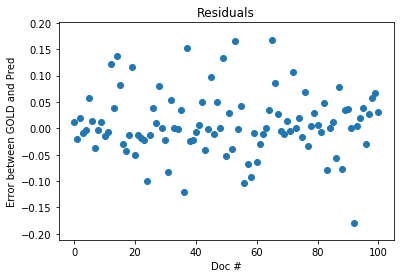

In [21]:
import matplotlib.pyplot as plt
 

# Plot
plt.scatter(list(range(len(l))), l)
plt.title('Residuals')
plt.xlabel('Doc #')
plt.ylabel('Error between GOLD and Pred')
plt.show()

In [16]:
np.sum(l**2)/len(l)

0.003586685938584069

In [17]:
gold_dict_measure

{'788626289': 0.00016233766233766234,
 '730093263': 0.023432923257176334,
 '999000858': 0.04205160879260911,
 '111111114': 0.008230452674897118,
 '730019938': 0.003971143027334701,
 '776385494': 0.001214347988541537,
 '999001323': 0.0023587523587523585,
 '700387229': 0.05434782608695652,
 '698719689': 0.010079575596816978,
 '790666929': 0.0019475920679886685,
 '699142854': 0.03160944771270524,
 '738442776': 0.07272216762600028,
 '761722669': 0.005145091582630171,
 '999001211': 0.004259462090787392,
 '788271400': 0.0042255332439234995,
 '725731328': 0.10812356979405033,
 '706501640': 0.05921308920919361,
 '707566605': 0.0893574297188755,
 '705035735': 0.03981797497155859,
 '763114850': 0.024430468204053108,
 '787730392': 0.09885636751308392,
 '702111021': 0.02654867256637168,
 '699478811': 0.04857142857142857,
 '706088110': 0.04643527204502814,
 '701447437': 0.21634615384615385,
 '708487008': 0.051051051051051045,
 '738361208': 0.0355297157622739,
 '725276027': 0.02880679362335054,
 '99

In [18]:
print (sorted_prediction)

[('111111117', 0.0), ('786004130', 1.555306706482518e-05), ('730081389', 0.00014341029685931449), ('111111114', 0.00025310048089091365), ('778094905', 0.00034980935390212334), ('730036755', 0.0003654970760233918), ('999000851', 0.00043162983425414363), ('730061195', 0.0006142506142506142), ('111111121', 0.0006648199445983379), ('738542398', 0.0009398496240601503), ('730019938', 0.0015240998285387692), ('999000878', 0.0016145773267212547), ('111111111', 0.002833243389098759), ('730093263', 0.0037921880925293893), ('789753303', 0.004543260357213846), ('778507244', 0.00576962703482382), ('708071969', 0.0062622309197651665), ('777869943', 0.006282051282051283), ('999000874', 0.007050528789659225), ('790499380', 0.007089790430141117), ('777720051', 0.007433920704845815), ('787966255', 0.007445537273646475), ('698719689', 0.007822685788787484), ('999001259', 0.008377331925378389), ('783774960', 0.00926470588235294), ('788626289', 0.01194184839044652), ('111111115', 0.013546910755148741), ('7

In [19]:
print (sorted_gold)

[('730036755', 0.0), ('730061195', 0.0), ('730081389', 0.0), ('111111121', 0.0), ('999000851', 4.489942528735632e-05), ('111111123', 6.582411795681939e-05), ('788626289', 0.00016233766233766234), ('790499380', 0.0003322995126273815), ('789753303', 0.0003510311540149188), ('761575506', 0.0008958566629339305), ('730269378', 0.0010887316276537834), ('776385494', 0.001214347988541537), ('788273361', 0.0013833080824715103), ('761568202', 0.0014952153110047847), ('787966255', 0.0016156670746634027), ('790666929', 0.0019475920679886685), ('999001323', 0.0023587523587523585), ('999000878', 0.0026800071466857246), ('785331076', 0.0034353419567427356), ('730019938', 0.003971143027334701), ('784382409', 0.004086371023914558), ('786004130', 0.004193175245806824), ('788271400', 0.0042255332439234995), ('999001211', 0.004259462090787392), ('999001290', 0.004369462313387547), ('730246508', 0.004456824512534819), ('789512681', 0.004859147032805472), ('761722669', 0.005145091582630171), ('794344513', 0